<a href="https://colab.research.google.com/github/JaiminPatel23/DL/blob/main/J035_DL_LAB01_30_11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwriting Recognition - Arabic Alphabets**

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the Dataset

In [2]:
!wget http://upscfever.com/datasets/csvTrainImages13440x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTrainLabel13440x1.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestImages3360x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestLabel3360x1.csv -P drive/app


--2020-12-06 17:52:23--  http://upscfever.com/datasets/csvTrainImages13440x1024.csv
Resolving upscfever.com (upscfever.com)... 104.27.176.133, 172.67.193.2, 104.27.177.133, ...
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/csvTrainImages13440x1024.csv [following]
--2020-12-06 17:52:23--  https://upscfever.com/datasets/csvTrainImages13440x1024.csv
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘drive/app/csvTrainImages13440x1024.csv’

csvTrainImages13440     [ <=>                ]  28.22M  --.-KB/s    in 0.1s    

2020-12-06 17:52:23 (195 MB/s) - ‘drive/app/csvTrainImages13440x1024.csv’ saved [29593405]

--2020-12-06 17:52:23--  http://upscfever.com/datasets/csvTrainLabel13440x1.csv
Resolving upscfever.com (upscfever.com)... 104.27.176.1

In [3]:
train_data = pd.read_csv('drive/app/csvTrainImages13440x1024.csv', header = None)
train_label = pd.read_csv('drive/app/csvTrainLabel13440x1.csv', header = None)
test_data = pd.read_csv('drive/app/csvTestImages3360x1024.csv', header = None)
test_label = pd.read_csv('drive/app/csvTestLabel3360x1.csv', header = None)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


In [5]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

## Visualizing the dataset(displaying data)

In [6]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

In [7]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

### The training set

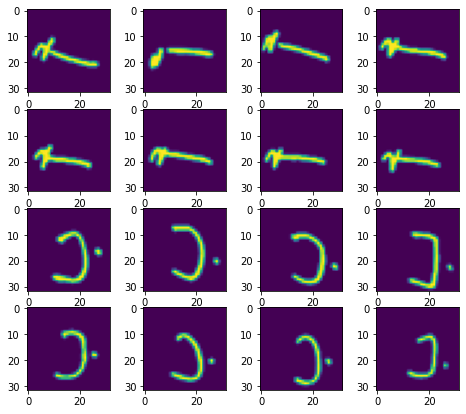

In [8]:
display_image(train_data, 32, 16)

### The test set

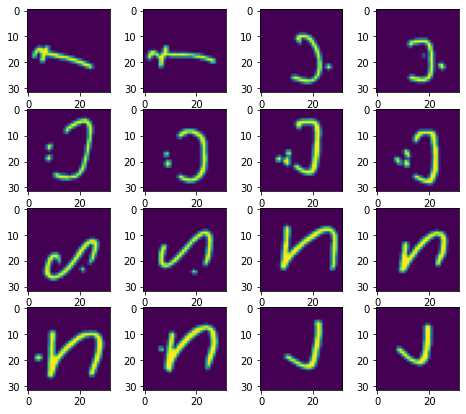

In [9]:
display_image(test_data, 32, 16)

## Data preprocessing

### Encoding

In [10]:
from keras.utils import to_categorical


In [11]:
train_label = to_categorical(train_label,28)

### Normalization

In [12]:
train_data = train_data/255
test_data = test_data/255

In [13]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

### Building the ANN

In [14]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 


In [15]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(32,32,1)),
                          keras.layers.Dense(128,activation = tf.nn.relu),
                          keras.layers.Dense(28,activation = tf.nn.softmax)])

In [16]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

### Image Data Generator

In [17]:
from keras.preprocessing.image import ImageDataGenerator


In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        validation_split=0.2)

val_generator = datagen.flow(train_data,subset='validation')


In [19]:
datagen.fit(train_data)

In [20]:
train_data.shape

(13440, 32, 32, 1)

In [21]:
train_label.shape

(13440, 28)

### Building ANN Model 

In [22]:
history = model.fit_generator(datagen.flow(train_data,train_label, batch_size=100), validation_data=val_generator,
                             epochs = 30, verbose = 2, steps_per_epoch=train_data.shape[0] // 100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
134/134 - 4s - loss: 2.9119 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
134/134 - 4s - loss: 2.4471 - accuracy: 0.2882 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
134/134 - 4s - loss: 2.1365 - accuracy: 0.3653 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
134/134 - 4s - loss: 1.9143 - accuracy: 0.4307 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
134/134 - 4s - loss: 1.7265 - accuracy: 0.4738 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
134/134 - 4s - loss: 1.5719 - accuracy: 0.5170 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
134/134 - 4s - loss: 1.4639 - accuracy: 0.5465 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 8/30
134/134 - 4s - loss: 1.3666 - accuracy: 0.5738 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 9/30
134/134 - 4s - loss: 1.2962 - accuracy: 0.5955 - 

In [23]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions,axis = 1)

### Confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(test_label, predictions)

In [26]:
accuracy = sum(cm[i][i] for i in range(28)) / test_label.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.8041666666666667


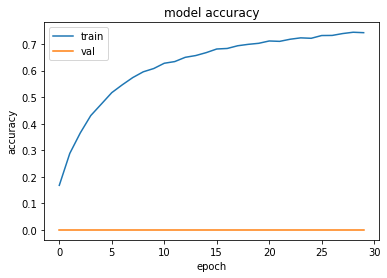

In [27]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


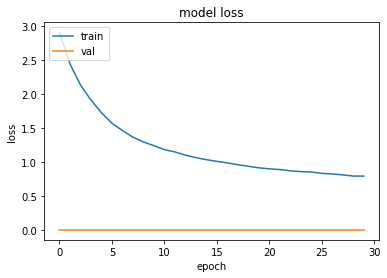

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [29]:
from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(test_label, predictions, average="macro"))
print('recall score - ', recall_score(test_label, predictions, average="macro"))    


precision score -  0.8132597934953262
recall score -  0.8041666666666668


### Saving Model

In [30]:
# save the model to disk
model.save('final_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: final_model/assets


### Loading Model

In [31]:
from tensorflow import keras
model = keras.models.load_model('final_model')


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 28)                3612      
Total params: 134,812
Trainable params: 134,812
Non-trainable params: 0
_________________________________________________________________


**0.8042**

# **Flower Recognition** 

### Importing necessary libraries

In [33]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [34]:
!wget http://upscfever.com/datasets/flowers-new.zip -P drive/app
import os
os.chdir('drive/app')  #change dir
!unzip -q flowers-new.zip  #unzip data in test/


--2020-12-06 18:07:06--  http://upscfever.com/datasets/flowers-new.zip
Resolving upscfever.com (upscfever.com)... 104.27.176.133, 104.27.177.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/flowers-new.zip [following]
--2020-12-06 18:07:07--  https://upscfever.com/datasets/flowers-new.zip
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘drive/app/flowers-new.zip’

flowers-new.zip         [          <=>       ]   5.74M  2.17MB/s    in 2.6s    

2020-12-06 18:07:10 (2.17 MB/s) - ‘drive/app/flowers-new.zip’ saved [6021364]



### Making the functions to get the training and validation set from the Images

In [35]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

In [36]:
def assign_label(img,flower_type):
    return flower_type
    

In [37]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        
        

In [38]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 13/13 [00:00<00:00, 217.44it/s]

13


In [39]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 398.08it/s]

39


In [40]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 369.67it/s]

65


In [41]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 420.81it/s]

91


In [42]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 360.79it/s]

117


### Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [43]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

### Splitting into Training and Validation Sets

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

### Setting the Random Seeds

In [45]:
np.random.seed(42)
rn.seed(42)


### Building the ANN

In [68]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [69]:
nn = models.Sequential()
nn.add(layers.Flatten(input_shape=(150,150,3)))
nn.add(layers.Dense(1024, activation="relu"))
nn.add(layers.Dense(512, activation="relu"))
nn.add(layers.Dense(128, activation="relu"))
nn.add(layers.Dense(64, activation="relu"))
nn.add(layers.Dense(5, activation="softmax"))

nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              69121024  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 325       
Total params: 69,720,069
Trainable params: 69,720,069
Non-trainable params: 0
__________________________________________

# Using callbacks

In [70]:
nn.compile(optimizer="adam",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [71]:
history = nn.fit(x_train,y_train, epochs=5000, batch_size = 10, validation_split=0.20, verbose=2, callbacks=[es, mc])

Epoch 1/5000

Epoch 00001: val_accuracy improved from -inf to 0.11111, saving model to best_model.h5
7/7 - 3s - loss: 36.9254 - accuracy: 0.2029 - val_loss: 26.1832 - val_accuracy: 0.1111
Epoch 2/5000

Epoch 00002: val_accuracy improved from 0.11111 to 0.38889, saving model to best_model.h5
7/7 - 6s - loss: 24.6655 - accuracy: 0.2754 - val_loss: 3.9616 - val_accuracy: 0.3889
Epoch 3/5000

Epoch 00003: val_accuracy did not improve from 0.38889
7/7 - 0s - loss: 11.5956 - accuracy: 0.2174 - val_loss: 7.2719 - val_accuracy: 0.2222
Epoch 4/5000

Epoch 00004: val_accuracy did not improve from 0.38889
7/7 - 0s - loss: 7.6385 - accuracy: 0.3043 - val_loss: 5.4994 - val_accuracy: 0.3889
Epoch 5/5000

Epoch 00005: val_accuracy did not improve from 0.38889
7/7 - 0s - loss: 3.5576 - accuracy: 0.4783 - val_loss: 2.9797 - val_accuracy: 0.2222
Epoch 6/5000

Epoch 00006: val_accuracy did not improve from 0.38889
7/7 - 0s - loss: 2.2549 - accuracy: 0.5942 - val_loss: 2.4635 - val_accuracy: 0.2222
Epoch

In [72]:
x_train.shape

(87, 150, 150, 3)

In [73]:
x_test.shape

(30, 150, 150, 3)

In [74]:
saved_model = load_model('best_model.h5')

In [75]:
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=2)
print('Test: %.3f' % ( test_acc))

1/1 - 0s - loss: 2.8814 - accuracy: 0.4333
Test: 0.433


# Plots

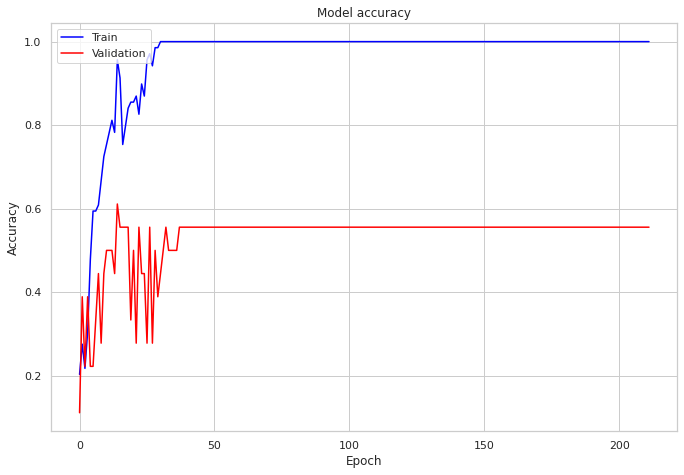

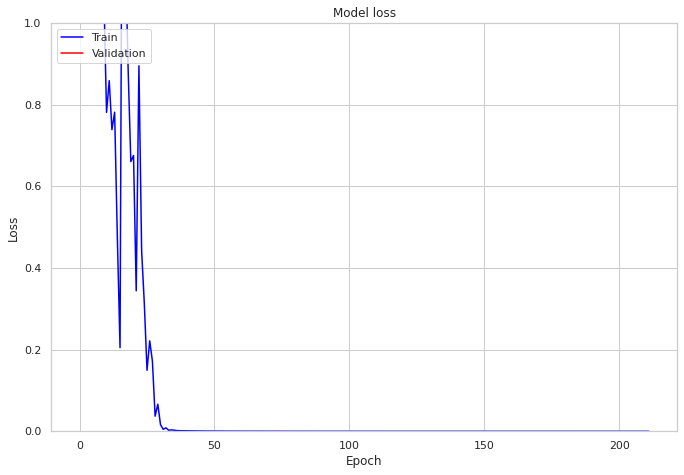

In [76]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Precision and Recall

In [77]:
from tensorflow import keras
model = keras.models.load_model('best_model.h5')

In [78]:
predictions = model.predict(x_test)

In [79]:
a = np.argmax( predictions ,axis=1)

In [80]:
a

array([3, 2, 3, 3, 1, 1, 1, 2, 1, 4, 1, 3, 4, 1, 1, 1, 3, 1, 2, 2, 2, 2,
       4, 1, 3, 4, 1, 1, 3, 1])

In [81]:
b = np.argmax( y_test ,axis=1)
b

array([3, 0, 3, 3, 0, 4, 4, 2, 1, 0, 3, 1, 2, 2, 1, 0, 3, 2, 4, 2, 4, 4,
       2, 0, 1, 4, 1, 1, 3, 1])

In [83]:
cm = confusion_matrix(a,b)
cm

array([[0, 0, 0, 0, 0],
       [3, 5, 2, 1, 2],
       [1, 0, 2, 0, 3],
       [0, 2, 0, 5, 0],
       [1, 0, 2, 0, 1]])

In [84]:
accuracy = sum(cm[i][i] for i in range(5)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.43333333333333335


In [85]:

from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(a, b, average="macro"))
print('recall score - ', recall_score(a, b, average="macro"))

precision score -  0.4095238095238095
recall score -  0.3364468864468865


# Saving and Loading model

In [86]:
model.save('final_model2')

INFO:tensorflow:Assets written to: final_model2/assets


In [87]:
from tensorflow import keras
model = keras.models.load_model('final_model2')

**0.4333**